In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
train_data_file = "C:/Users/Stille/Desktop/ML projects/zhengqi_train.txt"
test_data_file =  "C:/Users/Stille/Desktop/ML projects/zhengqi_test.txt"

train_data = pd.read_csv(train_data_file, sep = '\t', encoding = 'utf-8')
test_data = pd.read_csv(test_data_file, sep = '\t', encoding = 'utf-8')

In [4]:
from sklearn import preprocessing 

features_columns = [col for col in train_data.columns if col not in ['target']]
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler = min_max_scaler.fit(train_data[features_columns])

train_data_scaler = min_max_scaler.transform(train_data[features_columns])
test_data_scaler = min_max_scaler.transform(test_data[features_columns])

train_data_scaler = pd.DataFrame(train_data_scaler)
train_data_scaler.columns = features_columns

test_data_scaler = pd.DataFrame(test_data_scaler)
test_data_scaler.columns = features_columns

train_data_scaler['target'] = train_data['target']

In [5]:
from sklearn.decomposition import PCA

# keep 16 main components
pca = PCA(n_components = 16)
new_train_pca_16 = pca.fit_transform(train_data_scaler.iloc[:,0:-1])
new_test_pca_16 = pca.transform(test_data_scaler)
new_train_pca_16 = pd.DataFrame(new_train_pca_16)
new_test_pca_16 = pd.DataFrame(new_test_pca_16)
new_train_pca_16['target'] = train_data_scaler['target']

In [8]:
new_train_pca_16 = new_train_pca_16.fillna(0)
train = new_train_pca_16[new_test_pca_16.columns]
target = new_train_pca_16['target']

train_data,test_data,train_target,test_target=train_test_split(train,target,test_size=0.2,random_state=0)

In [11]:
train_data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000
mean,0.002989,-0.008281,0.002797,0.000354,0.001858,0.000147,-0.000941,0.001790,0.000061,0.000271,-0.000741,0.000579,-0.000467,-0.000828,0.000911,-0.000535
std,0.394597,0.350549,0.295898,0.274532,0.202997,0.198479,0.187522,0.160724,0.150369,0.143795,0.134484,0.128218,0.119480,0.115609,0.111986,0.101478
min,-0.986539,-0.938240,-1.019585,-0.677282,-0.764850,-0.553137,-0.569975,-0.591398,-0.629765,-0.480493,-0.597514,-0.577408,-0.425859,-0.457631,-0.388889,-0.366001
25%,-0.274865,-0.267829,-0.205927,-0.199746,-0.122334,-0.124497,-0.129303,-0.101216,-0.097022,-0.092725,-0.084491,-0.077403,-0.075035,-0.076345,-0.071586,-0.066335
50%,-0.009937,-0.021979,-0.017446,-0.023018,-0.003878,-0.015248,0.000476,-0.003855,0.000393,-0.002405,0.006218,-0.004495,-0.008773,-0.001051,-0.001432,-0.001741
75%,0.222420,0.228791,0.214496,0.170848,0.126605,0.102232,0.127430,0.098522,0.098963,0.091660,0.083956,0.071885,0.068750,0.078599,0.071021,0.062391
max,1.603357,1.351734,1.021067,1.423139,0.996998,1.301563,0.625918,0.745483,0.642001,0.582436,0.616507,0.654392,0.556001,0.513982,0.470583,0.450676


In [12]:
# Underfitting
clf = SGDRegressor(max_iter = 500, tol = 1e-2) 
clf.fit(train_data, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data))
score_test = mean_squared_error(test_target, clf.predict(test_data))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.1514421284928222
SGDRegressor test MSE:    0.1558639643295094


In [13]:
# Overfitting
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(5)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.transform(test_data)
clf = SGDRegressor(max_iter = 1000, tol = 1e-3) 
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.1324219236954741
SGDRegressor test MSE:    0.14465014861851666


In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.transform(test_data)
clf = SGDRegressor(max_iter = 1000, tol = 1e-3) 
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.1342466474667087
SGDRegressor test MSE:    0.1422616758504279


In [15]:
# L2 regularization
poly = PolynomialFeatures(3)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.transform(test_data)
clf = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty= 'L2', alpha = 0.0001) 
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.13401666743929025
SGDRegressor test MSE:    0.14241219473235814


In [16]:
# L1 regularization
poly = PolynomialFeatures(3)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.transform(test_data)
clf = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'L1', alpha = 0.00001) 
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.134278978690917
SGDRegressor test MSE:    0.1427174738327596


In [17]:
# ElasticNet regularization
poly = PolynomialFeatures(3)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.transform(test_data)
clf = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'elasticnet', l1_ratio = 0.9, alpha = 0.00001) 
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.13517796198448848
SGDRegressor test MSE:    0.14317942839766973


In [12]:
# Hold-out method
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target = train_test_split(train,target,test_size=0.2,random_state=0)

clf = SGDRegressor(max_iter = 1000, tol = 1e-3) 
clf.fit(train_data, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data))
score_test = mean_squared_error(test_target, clf.predict(test_data))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.14156196479932634
SGDRegressor test MSE:    0.1471469765645856


In [19]:
# K-fold cross validation
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5)
for k, (train_index, test_index) in enumerate(kf.split(train)):
    train_data,test_data,train_target,test_target = train.values[train_index],train.values[test_index],target[train_index],target[test_index]
    clf = SGDRegressor(max_iter = 1000, tol = 1e-3) 
    clf.fit(train_data, train_target)
    score_train = mean_squared_error(train_target, clf.predict(train_data))
    score_test = mean_squared_error(test_target, clf.predict(test_data))
    print(k, " fold", "SGDRegressor train MSE:   ", score_train)
    print(k, " fold", "SGDRegressor test MSE:   ", score_test, '\n')

0  fold SGDRegressor train MSE:    0.1498520687852363
0  fold SGDRegressor test MSE:    0.10594705015731543 

1  fold SGDRegressor train MSE:    0.13351158548801398
1  fold SGDRegressor test MSE:    0.1820320034248742 

2  fold SGDRegressor train MSE:    0.14711272773033537
2  fold SGDRegressor test MSE:    0.13336314521230824 

3  fold SGDRegressor train MSE:    0.14074458159925257
3  fold SGDRegressor test MSE:    0.16279857784380783 

4  fold SGDRegressor train MSE:    0.13808720626987853
4  fold SGDRegressor test MSE:    0.16450555366038655 



In [24]:
# LeaveOneOut method
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
num = 100
for k, (train_index, test_index) in enumerate(loo.split(train)):
    train_data,test_data,train_target,test_target = train.values[train_index],train.values[test_index],target[train_index],target[test_index]
    clf = SGDRegressor(max_iter = 1000, tol = 1e-3) 
    clf.fit(train_data, train_target)
    score_train = mean_squared_error(train_target, clf.predict(train_data))
    score_test = mean_squared_error(test_target, clf.predict(test_data))
    print("k =", k, " SGDRegressor train MSE:   ", score_train)
    print("k =", k, " SGDRegressor test MSE:   ", score_test, '\n') 
    if k >= 9:
        break

k = 0  SGDRegressor train MSE:    0.14175865386409833
k = 0  SGDRegressor test MSE:    0.012601112896984335 

k = 1  SGDRegressor train MSE:    0.14160454713412174
k = 1  SGDRegressor test MSE:    0.1233754131716392 

k = 2  SGDRegressor train MSE:    0.14171780001353038
k = 2  SGDRegressor test MSE:    0.04469576919974288 

k = 3  SGDRegressor train MSE:    0.14162183342787227
k = 3  SGDRegressor test MSE:    0.003270582842313775 

k = 4  SGDRegressor train MSE:    0.14166123366850386
k = 4  SGDRegressor test MSE:    0.012531193846622463 

k = 5  SGDRegressor train MSE:    0.14171603559086832
k = 5  SGDRegressor test MSE:    0.13195353457932005 

k = 6  SGDRegressor train MSE:    0.14089008996808428
k = 6  SGDRegressor test MSE:    0.02832709805344474 

k = 7  SGDRegressor train MSE:    0.14098224042043878
k = 7  SGDRegressor test MSE:    0.001400937720493697 

k = 8  SGDRegressor train MSE:    0.14157219717085173
k = 8  SGDRegressor test MSE:    0.08935686498504654 

k = 9  SGDRegres

In [23]:
# LeavePOut
from sklearn.model_selection import LeavePOut
lpo = LeavePOut(p = 10)
num = 100
for k, (train_index, test_index) in enumerate(lpo.split(train)):
    train_data,test_data,train_target,test_target = train.values[train_index],train.values[test_index],target[train_index],target[test_index]
    clf = SGDRegressor(max_iter = 1000, tol = 1e-3) 
    clf.fit(train_data, train_target)
    score_train = mean_squared_error(train_target, clf.predict(train_data))
    score_test = mean_squared_error(test_target, clf.predict(test_data))
    print("k =", k, " p = 10", "SGDRegressor train MSE:   ", score_train)
    print("k =", k, " p = 10", "SGDRegressor test MSE:   ", score_test, '\n')
    if k >= 9:
        break

k = 0  p = 10 SGDRegressor train MSE:    0.14122982941643483
k = 0  p = 10 SGDRegressor test MSE:    0.04865289605045177 

k = 1  p = 10 SGDRegressor train MSE:    0.14197148232700418
k = 1  p = 10 SGDRegressor test MSE:    0.044990699679139746 

k = 2  p = 10 SGDRegressor train MSE:    0.1420042242108249
k = 2  p = 10 SGDRegressor test MSE:    0.046379582463708886 

k = 3  p = 10 SGDRegressor train MSE:    0.14188384051783925
k = 3  p = 10 SGDRegressor test MSE:    0.05413293767211967 

k = 4  p = 10 SGDRegressor train MSE:    0.14188734223511754
k = 4  p = 10 SGDRegressor test MSE:    0.06878177252954576 

k = 5  p = 10 SGDRegressor train MSE:    0.14199606984877516
k = 5  p = 10 SGDRegressor test MSE:    0.0454918875253351 

k = 6  p = 10 SGDRegressor train MSE:    0.1418992118394741
k = 6  p = 10 SGDRegressor test MSE:    0.04932919621304162 

k = 7  p = 10 SGDRegressor train MSE:    0.14187428359237844
k = 7  p = 10 SGDRegressor test MSE:    0.05310464891360287 

k = 8  p = 10 SGD

In [25]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target = train_test_split(train,target,test_size = 0.2,random_state = 0)

randomForestRegressor = RandomForestRegressor()
parameters = {
              'n_estimators':[50, 100, 200],
              'max_depth':[1, 2, 3]
        }


clf = GridSearchCV(randomForestRegressor, parameters, cv = 5)
clf.fit(train_data, train_target)

score_test = mean_squared_error(test_target, clf.predict(test_data))

print("RandomForestRegressor GridSearchCV test MSE:   ", score_test)
sorted(clf.cv_results_.keys())

RandomForestRegressor GridSearchCV test MSE:    0.2556821168922327


['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [26]:
# RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(train,target,test_size = 0.2,random_state = 0)

randomForestRegressor = RandomForestRegressor()
parameters = {
              'n_estimators':[50, 100, 200, 300],
              'max_depth':[1, 2, 3, 4, 5]
        }


clf = RandomizedSearchCV(randomForestRegressor, parameters, cv = 5)
clf.fit(train_data, train_target)

score_test = mean_squared_error(test_target, clf.predict(test_data))

print("RandomForestRegressor RandomizedSearchCV test MSE:   ", score_test)
sorted(clf.cv_results_.keys())

RandomForestRegressor RandomizedSearchCV test MSE:    0.1958348616089702


['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [27]:
clf = lgb.LGBMRegressor(num_leaves = 31)

parameters = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [20, 40]
}

clf = GridSearchCV(clf, parameters, cv = 5)
clf.fit(train_data, train_target)

print('Best parameters found by grid search are:', clf.best_params_)
score_test = mean_squared_error(test_target, clf.predict(test_data))
print("LGBMRegressor RandomizedSearchCV test MSE:   ", score_test)

Best parameters found by grid search are: {'learning_rate': 0.1, 'n_estimators': 40}
LGBMRegressor RandomizedSearchCV test MSE:    0.15008319439650442


In [28]:
train_data2 = pd.read_csv("C:/Users/Stille/Desktop/ML projects/zhengqi_train.txt", sep = '\t')
test_data2 = pd.read_csv("C:/Users/Stille/Desktop/ML projects/zhengqi_test.txt", sep = '\t')

train_data2_f = train_data2[test_data2.columns].values
train_data2_target = train_data2['target'].values

In [29]:
# lgb modeling
from sklearn.model_selection  import KFold
import lightgbm as lgb
import numpy as np


Folds = 5
kf = KFold(n_splits = Folds, random_state = 100, shuffle = True)

MSE_DICT = {
    'train_mse':[],
    'test_mse':[]
}

for i, (train_index, test_index) in enumerate(kf.split(train_data2_f)):
    lgb_reg = lgb.LGBMRegressor(
        learning_rate = 0.01,
        max_depth = -1,
        n_estimators = 100,
        boosting_type = 'gbdt',
        random_state = 100,
        objective = 'regression',
    )
   
    X_train_KFold, X_test_KFold = train_data2_f[train_index], train_data2_f[test_index]
    y_train_KFold, y_test_KFold = train_data2_target[train_index], train_data2_target[test_index]
    
    lgb_reg.fit(
            X = X_train_KFold, y = y_train_KFold,
            eval_set = [(X_train_KFold, y_train_KFold),(X_test_KFold, y_test_KFold)],
            eval_names = ['Train','Test'],
            early_stopping_rounds = 100,
            eval_metric = 'MSE',
            verbose = 50
        )


    y_train_KFold_predict = lgb_reg.predict(X_train_KFold,num_iteration=lgb_reg.best_iteration_)
    y_test_KFold_predict = lgb_reg.predict(X_test_KFold,num_iteration=lgb_reg.best_iteration_) 
    
    print('i = {} training MSE testing MSE'.format(i))
    train_mse = mean_squared_error(y_train_KFold_predict, y_train_KFold)
    print('------\n', 'training MSE\n', train_mse, '\n------')
    test_mse = mean_squared_error(y_test_KFold_predict, y_test_KFold)
    print('------\n', 'testing MSE\n', test_mse, '\n------\n')
    
    MSE_DICT['train_mse'].append(train_mse)
    MSE_DICT['test_mse'].append(test_mse)
print('------\n', 'training MSE\n', MSE_DICT['train_mse'], '\n', np.mean(MSE_DICT['train_mse']), '\n------')
print('------\n', 'testing MSE\n', MSE_DICT['test_mse'], '\n', np.mean(MSE_DICT['test_mse']), '\n------')

[50]	Train's l2: 0.436254	Test's l2: 0.431272
[100]	Train's l2: 0.223959	Test's l2: 0.247217
i = 0 training MSE testing MSE
------
 training MSE
 0.22395910176815867 
------
------
 testing MSE
 0.24721747302378572 
------

[50]	Train's l2: 0.431451	Test's l2: 0.447702
[100]	Train's l2: 0.221409	Test's l2: 0.25435
i = 1 training MSE testing MSE
------
 training MSE
 0.22140920255015417 
------
------
 testing MSE
 0.2543498234383045 
------

[50]	Train's l2: 0.428323	Test's l2: 0.460512
[100]	Train's l2: 0.221398	Test's l2: 0.256187
i = 2 training MSE testing MSE
------
 training MSE
 0.22139783747290231 
------
------
 testing MSE
 0.25618731408519657 
------

[50]	Train's l2: 0.434628	Test's l2: 0.446356
[100]	Train's l2: 0.225142	Test's l2: 0.250629
i = 3 training MSE testing MSE
------
 training MSE
 0.22514211678664525 
------
------
 testing MSE
 0.2506288004181115 
------

[50]	Train's l2: 0.428001	Test's l2: 0.462447
[100]	Train's l2: 0.2212	Test's l2: 0.256939
i = 4 training M

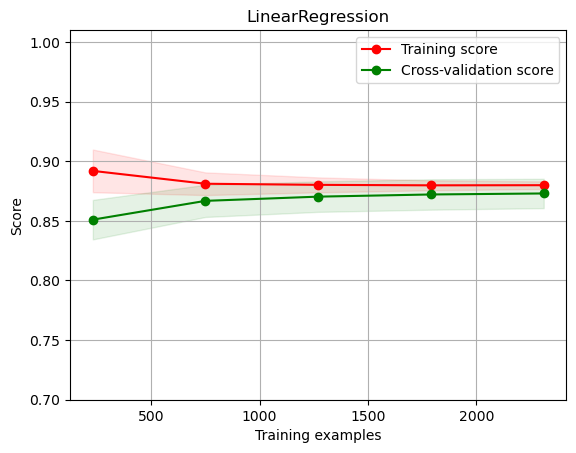

In [30]:
# Learning curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection 
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import learning_curve


def plot_learning_curve(estimator, title, X, y, ylim = None, cv = None,
                        n_jobs = 1, train_sizes = np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv = cv, n_jobs = n_jobs, train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha = 0.1,
                     color = "r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha = 0.1, color = "g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color = "r",
             label = "Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color = "g",
             label = "Cross-validation score")

    plt.legend(loc = "best")
    return plt


X = train_data2[test_data2.columns].values
y = train_data2['target'].values


title = "LinearRegression"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = model_selection.ShuffleSplit(n_splits = 100,
                                   test_size = 0.2, random_state = 0)

estimator = SGDRegressor()
plot_learning_curve(estimator, title, X, y, ylim = (0.7, 1.01), cv = cv, n_jobs = -1)
plt.show()

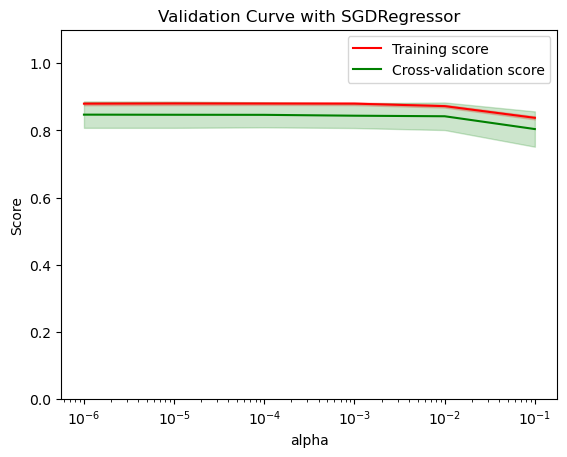

In [31]:
# Validation curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import validation_curve

X = train_data2[test_data2.columns].values
y = train_data2['target'].values

param_range = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]
train_scores, test_scores = validation_curve(
    SGDRegressor(max_iter = 1000, tol = 1e-3, penalty= 'L1'), X, y, param_name = "alpha", param_range = param_range,
    cv = 10, scoring = 'r2', n_jobs = 1)
train_scores_mean = np.mean(train_scores, axis = 1)
train_scores_std = np.std(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)
test_scores_std = np.std(test_scores, axis = 1)

plt.title("Validation Curve with SGDRegressor")
plt.xlabel("alpha")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.semilogx(param_range, train_scores_mean, label = "Training score", color = "r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha = 0.2, color = "r")
plt.semilogx(param_range, test_scores_mean, label = "Cross-validation score",
             color = "g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha = 0.2, color = "g")
plt.legend(loc = "best")
plt.show()